<a href="https://colab.research.google.com/github/AndresAlvarez1999/fifa-world-cup-hypothesis-testing-python/blob/main/World_Cup_Goals_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Introduction: Hypothesis testing of Goals in FIFA World Cup vs FIFA World Cup Qualifiers

**Background:**

Football is a sport that unites people across the globe, with the FIFA World Cup standing as the pinnacle of international competition. However, the journey to the World Cup is just as intense, with teams battling through the qualifiers to secure a spot in the prestigious tournament.


 I’ve always been curious about the scoring dynamics in these different stages of the competition. This project aims to explore whether there are more goals scored on average in the FIFA World Cup compared to the FIFA World Cup qualifiers.

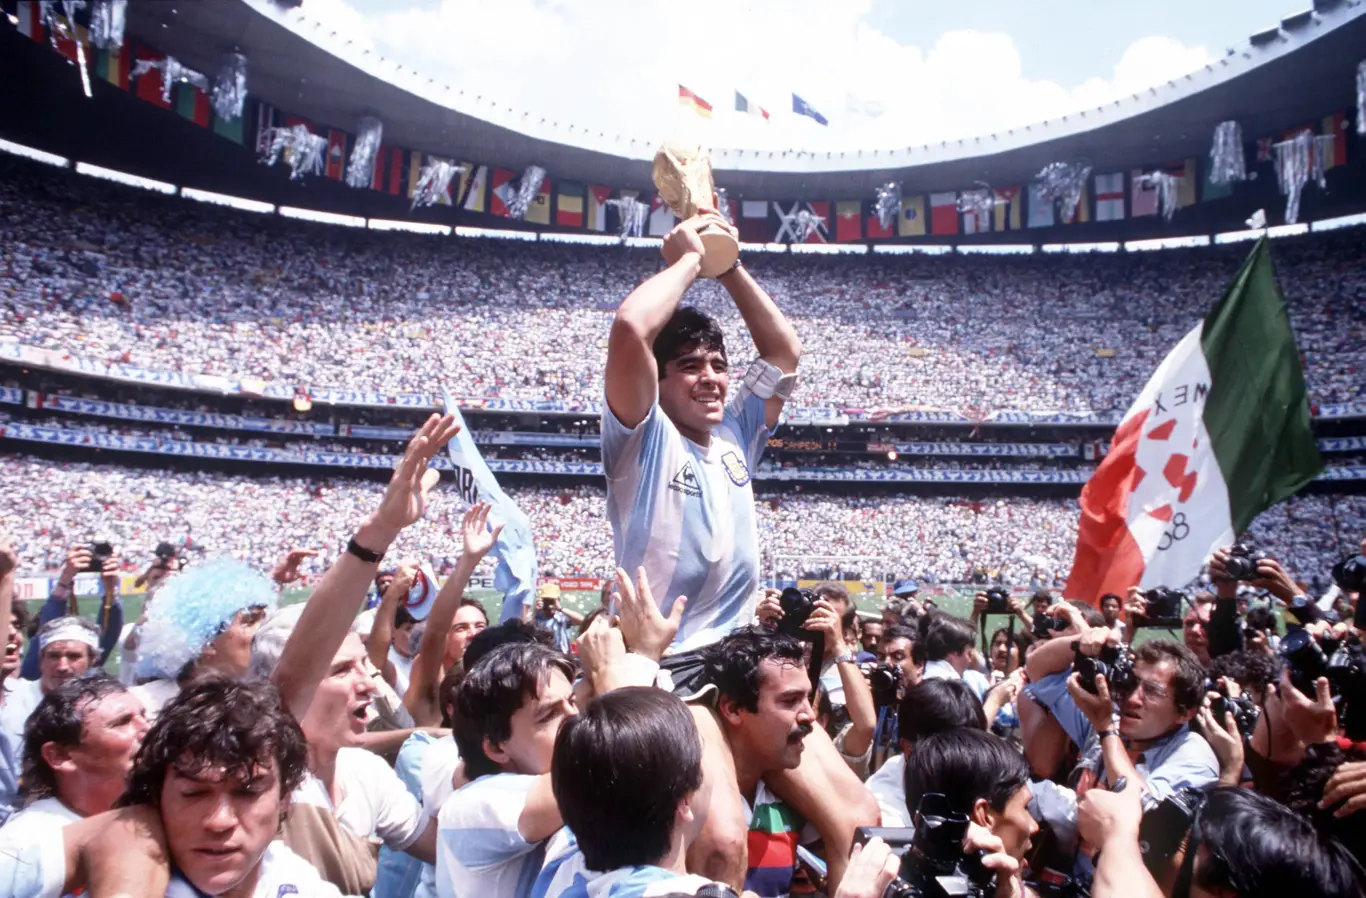


**About the Dataset:**

The dataset used in this project includes 47,126 international football match results, starting from the first official match in 1872 and extending up to 2024. It covers a wide range of competitions, from FIFA World Cup matches to smaller tournaments and friendlies. However, the data is restricted to men’s full international matches, excluding Olympic Games or matches involving B-teams, U-23 squads, or league select teams.

The dataset can be accessed on Kaggle at the following link: [International Football Results from 1872 to 2017.](https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017)


**The dataset (results.csv) includes the following columns:**

* Date: The date the match was played.

* Home Team: Name of the home team.

* Away Team: Name of the away team.

* Home Score: Full-time score of the home team (including extra time but excluding penalty shootouts).

* Away Score: Full-time score of the away team (including extra time but excluding penalty shootouts).

* Tournament: Name of the tournament.

* City: City where the match was held.

* Country: Country where the match was held.

* Neutral Venue: Boolean indicating whether the match was played on neutral ground.

**Project Objective:**

The goal of this project is to analyze whether more goals are scored on average in FIFA World Cup matches compared to FIFA World Cup qualifiers. By comparing the goal-scoring trends in both tournament stages, we will use hypothesis testing techniques to determine if the difference in average goals is statistically significant.

By the end of this project, we will have gained insights into whether the high stakes of the World Cup lead to more goals compared to the competitive, yet more frequent, qualifier matches.



In [28]:
# We will start by importing the necessary packages for the project
!pip install pingouin # install the pingouin library

import pandas as pd
import matplotlib.pyplot as plt
import pingouin


After importing all the necessary packages, the next step involves loading the CSV file that is stored in my Google Drive. To do this, we will first mount Google Drive to the Colab environment, which allows us to access files directly from the cloud.

 Once the drive is mounted, we will navigate to the specific location of the CSV file, or alternatively, use the file's unique ID to download it. Once the file is accessible in the Colab environment, we will then proceed by reading the CSV into a DataFrame using the pandas library, enabling us to analyze and manipulate the data as needed.

In [29]:
# Load the csv from drive conecting drive to google colab and pandas to read the csv (pd.read_csv())

df = pd.read_csv('/content/drive/MyDrive/Data_projects/results.csv')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


After loading the CSV file into a DataFrame, we will begin the Exploratory Data Analysis (EDA) process to better understand the structure and characteristics of the dataset. This involves inspecting the data types, checking for missing values, and understanding the distribution of key features. We will start by using the df.info() function to get an overview of the dataset, including the number of entries, data types of each column, and any potential null values. Additionally, to explore the distribution of categorical variables, we will utilize value_counts() to see the frequency of unique values within these columns. This initial analysis will help us identify any patterns or irregularities before proceeding with further analysis.

In [30]:
# Performing EDA with .info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44934 entries, 0 to 44933
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        44934 non-null  object
 1   home_team   44934 non-null  object
 2   away_team   44934 non-null  object
 3   home_score  44934 non-null  int64 
 4   away_score  44934 non-null  int64 
 5   tournament  44934 non-null  object
 6   city        44934 non-null  object
 7   country     44934 non-null  object
 8   neutral     44934 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.8+ MB


After reviewing the DataFrame using df.info(), we confirmed that there are no null values present in the dataset, indicating that the data is complete.

However, to ensure proper analysis, we need to make some adjustments to specific columns.

* The date column, currently stored as an object (string), needs to be converted to a datetime format to allow for time-based analysis and easier manipulation of date-related data.

* Also, the tournament column, which contains distinct categories representing different competitions, should be converted to a categorical data type to optimize memory usage and facilitate more efficient grouping and analysis of tournament-specific information.

These changes will improve the quality and usability of the data for further exploration and modeling.

In [31]:
# Updating columns so they are properly formatted

df['date'] = pd.to_datetime(df['date'])
df['tournament'] = df['tournament'].astype('category')

# Lets check if the dataframe has already the correct data types

df.dtypes

,0
date,datetime64[ns]
home_team,object
away_team,object
home_score,int64
away_score,int64
tournament,category
city,object
country,object
neutral,bool


Since our focus is on comparing matches from the The World Cup and the World Cup Qualifiers, the first step will be to use the value_counts() function on the tournament column. This will give us a clear count of how many games from each are present in the dataset, allowing us to confirm that we have enough data for both tournaments.

In [32]:
# Use value_counts() to confirm there is enough data from La Liga and Premier League to perform the analysis

df['tournament'].value_counts().head()

,count
tournament,
Friendly,17706
FIFA World Cup qualification,7888
UEFA Euro qualification,2723
African Cup of Nations qualification,1997
FIFA World Cup,964


Once we have this information, we can confirm that the number of games from the FIFA Wolrd Cup and from FIFA World Cup qualifiers is enough for analysis. (n must be greater than 30 observations for each group for a parametric test)

To facilitate our analysis of goal-scoring patterns between the FIFA World Cup and the FIFA World Cup qualifiers, we will add a new column to the dataset, total_goals, which will represent the sum of goals scored in each match. This column will allow us to perform a detailed comparison of goal frequencies between these two competitions and assess any significant differences in scoring behavior.

In [33]:
# Create total_goals column

df['total_goals'] = df['home_score'] + df['away_score']



We will subset the DataFrame to include only the matches from these two competitions. This will ensure that we are working with relevant data for our analysis

In [50]:
#Subset dataframe to only include World Cup and Qualifiers games

# Filter the dataframe to only include 'FIFA World Cup' and 'FIFA World Cup qualification'
WC = df[df['tournament'].isin(['FIFA World Cup', 'FIFA World Cup qualification'])]

WC['tournament'].value_counts()

,count
tournament,
FIFA World Cup qualification,7888
FIFA World Cup,964
ABCS Tournament,0
Millennium Cup,0
Mahinda Rajapaksa Cup,0
...,...
Copa Chevallier Boutell,0
Copa Confraternidad,0
Copa Félix Bogado,0


**Because there are two independent groups, this scenario requires an unpaired two-sample test.**

An unpaired t-test and a Wilcoxon-Mann-Whitney test are the two most commmon two-sample tests, where the Wilcoxon-Mann-Whitney test is a non-parametric version of the unpaired t-test.

To determine if a parametric or non-parametric test is appropriate, you'll need to verify the underlying assumptions of parametric tests, including checking the sample size in each group and the normality of each distribution.

We have already verified that the number of obserbations is enough for a parametric test, we will continue by checking if the data is normally distributed in both groups

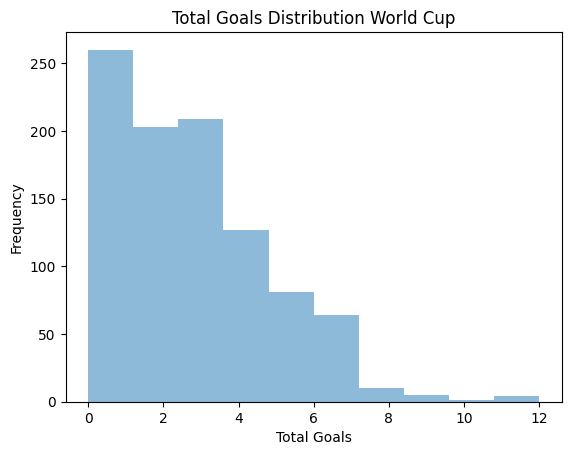

In [55]:
# To review if data is normally distributed we will plot the total goals by tournament in a histogram

world_cup_df = WC[WC['tournament'] == 'FIFA World Cup']
world_cup_qualification_df = WC[WC['tournament'] == 'FIFA World Cup qualification']

# Create a histogram showing total goals for the World Cup
plt.hist(world_cup_df['total_goals'], bins=10, alpha=0.5, label='FIFA World Cup')

# Add labels and title
plt.title('Total Goals Distribution World Cup')
plt.xlabel('Total Goals')
plt.ylabel('Frequency')

# Show the plot
plt.show()

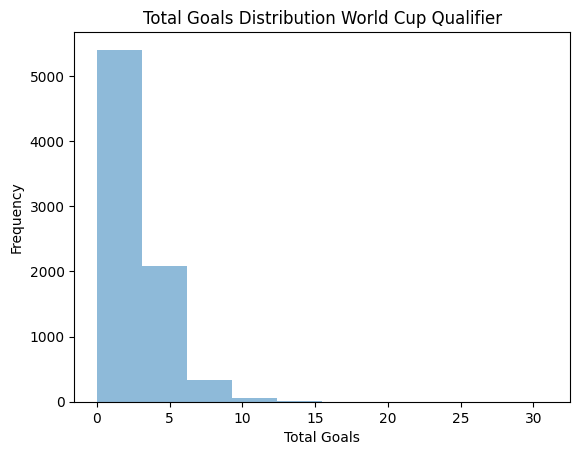

In [56]:
# Create a histogram showing total goals for the World Cup Qualifier

plt.hist(world_cup_qualification_df['total_goals'], bins=10, alpha=0.5, label='FIFA World Cup Qualifier')

# Add labels and title
plt.title('Total Goals Distribution World Cup Qualifier')
plt.xlabel('Total Goals')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Since neither the "FIFA World Cup" nor the "FIFA World Cup qualification" groups follow a normal distribution, we are unable to meet the assumptions required for a parametric test like the independent t-test. The primary assumptions for a parametric test include normality within each group and equal variances between the groups. As normality is not satisfied, we will instead apply a non-parametric test, which does not rely on these assumptions.

We will proceed with the Wilcoxon-Mann-Whitney test (also known as the Mann-Whitney U test), which is appropriate for comparing two independent groups when the data is not normally distributed. This test will allow us to determine whether there is a significant difference in the distribution of total goals scored between the "FIFA World Cup" and the "FIFA World Cup qualification" tournaments.

Before running the test, we will prepare the data by subsetting the relevant columns, focusing on the total_goals and the corresponding tournament groups. The data will be arranged in a wide format, where total goals from each match are grouped separately for the two tournaments, ensuring it is structured correctly for the test.



In [58]:
# Keep only columns to use in the test hypothesis

WC = WC[['total_goals', 'tournament']]

# Transform to wide format to be addecuate for the test

WC_wide = WC.pivot(columns="tournament", values="total_goals")

WC_wide.head()

tournament,FIFA World Cup,FIFA World Cup qualification
1311,3.0,NaN
1312,5.0,NaN
1313,3.0,NaN
1314,4.0,NaN
1315,1.0,NaN


Now that our data is in the correct format, we will proceed with conducting the hypothesis test at a significance level of 5%. Specifically, we will perform the non-parametric right-tailed Wilcoxon-Mann-Whitney test.

* The null hypothesis (H₀) is that the average goals scored in the FIFA World Cup qualifiers are the same as the average goals scored in the FIFA World Cup.
* The alternative hypothesis (H₁) is that the average goals scored in the FIFA World Cup qualifiers are greater than the average goals scored in the FIFA World Cup.

In [59]:
# Performing a right tailed Wilcoxon-Mann-Whitney test

alpha = 0.05  # Significance Level

# Ho : mean number of goals scored in FIFA World Cup qualifiers is the same as the average goals scored in the FIFA World Cup
# H1 : mean number of goals scored in FIFA World Cup qualifiers is greater than the average goals scored in the FIFA World Cup

results_pg = pingouin.mwu(x=WC_wide["FIFA World Cup qualification"],
                          y=WC_wide["FIFA World Cup"],
                          alternative="greater")

results_pg

,U-val,alternative,p-val,RBC,CLES
MWU,3856422.5,greater,0.230434,0.01431,0.507155


Now that we have performed the Wilcoxon-Mann-Whitney test, our next step is to compare the obtained p-value with the predetermined significance level of 5% (α = 0.05).

This comparison will guide us in deciding whether to reject or fail to reject the null hypothesis. If the p-value is less than or equal to the significance level, we will reject the null hypothesis, concluding that there is statistically significant evidence to support the claim that the average goals scored in the FIFA World Cup qualifiers are greater than the average goals scored in the FIFA World Cup.

Conversely, if the p-value is greater than 0.05, we will fail to reject the null hypothesis, indicating that the data does not provide sufficient evidence to support a difference in average goals between the two tournaments.

For this matter, we will create the variables p_value and result to store the results in a dictionary

In [61]:
#Creating variable p_value

p_value = results_pg["p-val"].values[0]

#If p-value <= alpha reject null hypothesis

if p_value <= alpha:
    result = "reject Ho"
else:
    result = "fail to reject Ho"

# Save results in a dictionary

result_dict = {"p_val": p_value, "result": result}

result_dict


{'p_val': 0.23043446928318734, 'result': 'fail to reject Ho'}

**Based on the results of the Wilcoxon-Mann-Whitney test, we obtained a p-value of 0.23, which is greater than the significance level of 0.05.**

**As a result, we fail to reject the null hypothesis. This indicates that there is no statistically significant evidence to conclude that the average goals scored in the FIFA World Cup qualifiers are greater than the average goals scored in the FIFA World Cup.**

**Therefore, the data does not support a difference in goal-scoring averages between the two tournaments at the 5% significance level.**